# Model Evaluation

There are many ways to assess the predictive performance of a machine learning model. In this notebook, we discuss some evaluation metrics for two supervised tasks, classification and regression.

# Evaluation Metrics for Classification

## Confusion matrix

For classification tasks, several evaluation metrics can be computed from entries coming from a *confusion matrix*.

A confusion matrix is ​​a tabular structure that presents a summary of the results produced by a classification model on a dataset.

The image below shows schematically a confusion matrix for a binary classification model.

![alt text](https://media.geeksforgeeks.org/wp-content/uploads/Confusion_Matrix1_1.png)

The diagonal elements of a confusion matrix represent the number of instances for which the class predicted by the model is equal to the true class (aka *golden truth*). These are the true positives (TP) and true negatives (TN). The higher the diagonal values ​​of the confusion matrix, the better. The elements outside the diagonal are those that were classified incorrectly. These are the false negatives (FN) and false positives (FP).

In Scikit-Learn, the function `confusion_matrix` produces a confusion matrix. This function expects to receive two arrays, one with the values ​​predicted by the classifier, and the other with the respective true values.

The code cell below exemplifies the creation of confusion matrices for a classifier using the `confusion_matrix` function.

In [1]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

url = "https://raw.githubusercontent.com/AILAB-CEFET-RJ/ml-class/master/datasets/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8] # data matrix
y = array[:,8] # target matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=.8)

min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

model = LogisticRegression(solver='lbfgs')

model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[97  6]
 [21 30]]


We can decorate the above output and generate an image for the confusion matrix by using the [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function of the Seaborn package. See the example below.

<Axes: >

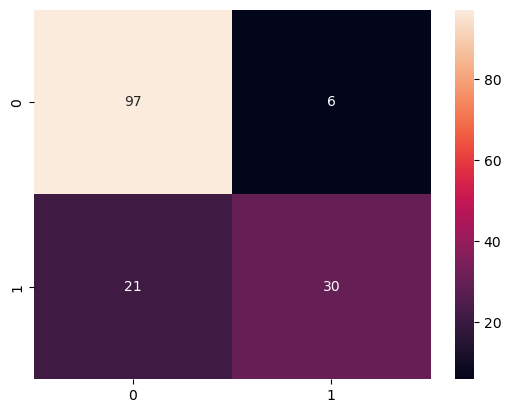

In [2]:
import seaborn as sns
sns.heatmap(cm, annot=True)

Confusion matrices are not restricted to binary classification problems. See the example below, which shows a graphical perspective of a confusion matrix resulting from a (ficticious) multiclass classification problem with six classes.

<Axes: >

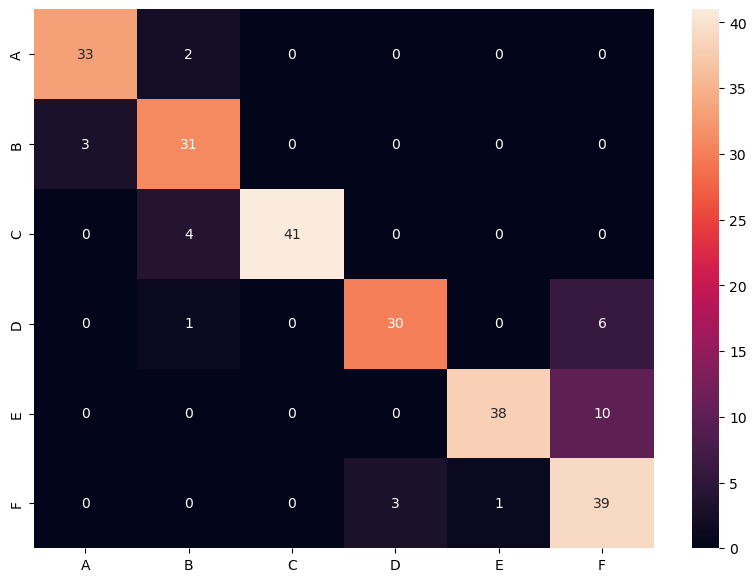

In [3]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = [[33,2,0,0,0,0],
        [3,31,0,0,0,0],
        [0,4,41,0,0,0],
        [0,1,0,30,0,6],
        [0,0,0,0,38,10],
        [0,0,0,3,1,39]]
df_cm = pd.DataFrame(array, index = [i for i in "ABCDEF"],
                  columns = [i for i in "ABCDEF"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

## Accuracy

The formal definition of the accuracy measure is the following.

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$


In Scikit-Learn, the function [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) procuces the accuracy measure for a given classification model. The following example illustrates the use of this function on the model previously fitted for the [Pima Indians dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8246753246753247

## Precision, recall, $F_1$

In addition to accuracy, there are other measures of predictive performance that can be calculated from the confusion matrix.

* precision
* recall
* $F_1$ score

To understand the measures listed above, suppose that each instance is of one of two classes, as sick and healthy. Call one class P (for "positive") and the other N (for "negative"). Consider building a model to classify future instances in classes P or N using a "score" associated with the values ​​of the target attribute. For example, like the results of laboratory tests. Another example: predict whether a person is a woman knowing how many shoes they have. When the score is high (greater than some borderline value, $t$), you classify the instance in class P; when the score is small (below the limit), you classify the instance as being of class N.

Regardless of the value chosen for $t$, the model will incorrectly classify some instances (unless the data is completely separable). Suppose your male/female classification rule is "predict that someone is female if they have more than 15 pairs of shoes". For this rule, $t = 15$.

* With this rule, the model will incorrectly classify any man who has more than 15 pairs of shoes. These individuals are false positives: the rule puts them in class P (female), but they do not belong to it.

* However, the model will correctly classify women who have more than 15 pairs of shoes. These individuals are true positives: the rule puts them in class P, and that is where they belong.

### Precision

Precision is associated with the following question: "When the model predicts that an instance is positive, how often is it correct?". The expression to compute the precision of a classification model is presented below.

$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

Precision is often the measure to optimize when the goal is to limit the number of false positives (FP) produced by the model. For example, in a spam message filtering program, this would possibly be the metric to be prioritized. That's because it is more critical to send a legitimate message to the spam box than to send a spam message to users' inbox.

### Recall

Recall is associated with the following question: "When an instance is effectively positive, how often does the classifier correctly predict this?". The expression to compute recall for a classification model is presented below.

$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

Recall is generally used when the objective is to limit the number of false negatives (FN). For example, consider a medical exam used to detect an illness; it would be more appropriate to prioritize the building of models that maximize recall, since it is more critical to inform a patient with the disease that he does not have it.

### $F_1$ score

$F_1$ score is the [harmonic mean](https://en.wikipedia.org/wiki/Harmonic_mean) between precision and recall. This metric should be used when both precision and recall need to be taken into account to produce a single evaluation value.

$$
F_1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

Being a harmonic mean, the $F_1$ measure penalizes models that present a great difference between values of precision and recall. Furthermore, this measure is prefered to accuracy in training scenarios involving unbalanced datasets.

## `classification_report` function

Scikit-learn provides the `classification_report` function, which produces a training evaluation report on a classification problem.

The `classification_report` function displays values for accuracy, precision, recall, F1, and support for each class.

The example below demonstrates the report produced for a binary classification problem.

In [5]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

url = "https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/datasets/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
y = array[:,8]

min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, train_size=.8)

lr_model = LogisticRegression(solver='lbfgs')

lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

In [6]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.92      0.85       102
         1.0       0.78      0.54      0.64        52

    accuracy                           0.79       154
   macro avg       0.79      0.73      0.75       154
weighted avg       0.79      0.79      0.78       154



For comparison purposes, let us build another model, this time with a decision tree learning algorithm.

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75       102
         1.0       0.50      0.50      0.50        52

    accuracy                           0.66       154
   macro avg       0.62      0.62      0.62       154
weighted avg       0.66      0.66      0.66       154



## Area Under the Curve (AUC)

Area under ROC Curve is a performance metric for measuring the ability of a binary classifier to discriminate between positive and negative classes.

AUC - Test Set: 80.97%


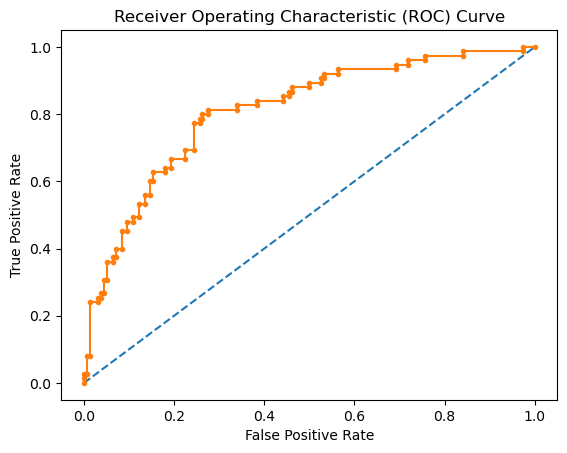

In [9]:
import warnings
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/datasets/pima-indians-diabetes.csv"
dataframe = pandas.read_csv(url)
dat = dataframe.values
X = dat[:,:-1]
y = dat[:,-1]
seed = 7

test_size = 0.3

#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                                                    test_size=test_size,
                                                                    random_state=seed)
model.fit(X_train, y_train)

# predict probabilities
probs = model.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# show the plot
plt.show()

# Evaluation Metrics for Regression

As in the classification task, we can evaluate the predictive performance of a regression model.

In the following discussion, consider that $\hat{\mathbf{y}}$ and $\mathbf{y}$ are two $m$-dimensional vectors, $m$ being the amount of examples used for evalution. The $i$-th entries in $\hat{\mathbf{y}}$ and $\mathbf{y}$ contain the predicted value and the effective value for the $i$-th sample, respectively.



## MSE, RMSE, MAE

Three metrics are commonly used to evaluate regression models.

* Mean Squared Error
$$
\text{MSE}(\mathbf{y}, \hat{\mathbf{y}}) = \frac{1}{m}\sum_{i=1}^{m}\left[y^{(i)}-h_{\Theta}(x^{(i)})\right]^{2}
$$

* Root Mean Squared Error (the square root of MSE).
$$
\text{RMSE}(\mathbf{y}, \hat{\mathbf{y}}) = \sqrt{\frac{1}{m}\sum_{i=1}^{m}\left[y^{(i)}-h_{\Theta}(x^{(i)})\right]^{2}}
$$

* Mean Absolute Error

$$
\text{MAE}(\mathbf{y}, \hat{\mathbf{y}}) = \frac{1}{m}\sum_{i=1}^{m}\left| y^{(i)}-h_{\Theta}(x^{(i)}) \right|
$$

In the expressions above:

* $h_{\Theta}$ represents the regression model learned by the algorithm, that is, $h_{\Theta}(x^{(i)})$ is the predicted value for example $x^{(i)}$;
* $m$ is the amount of examples;
* $(x^{(i)}, y^{(i)})$ is the $i$-th example.

Let us detail how the MSE measure is computed. For each of the $m$ training examples, the square of the difference between the value predicted by the model and the real value is computed first. Then, we add all these squared differences and divide by $m$ to obtain a single number. The final result is a statistic that represents the average distance between the model's predictions and the actual values.

The following figure illustrates this calculation process. Suppose that the blue line is a regression model produced by some regression algorithm. In this case, $\text{MSE}$  would produce a value that is a function of the distances of each example in the dataset (red dots) to the regressed line. These distances are depicted as green line segments. The average of the squred lengths of the green segments is the value of $\text{MSE}$.

<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png'></center>

In general, regression algorithms search for a setting of parameters that minimizes the value of one of the above measures.


Scikit-Learn provides functions to compute each of the evaluation metrics above, as shown in the following example. This example uses the [California Housing](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html) dataset, which comes with Scikit-Learn.

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

# Load the housing dataset
X = california_housing.data
y = california_housing.target

X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

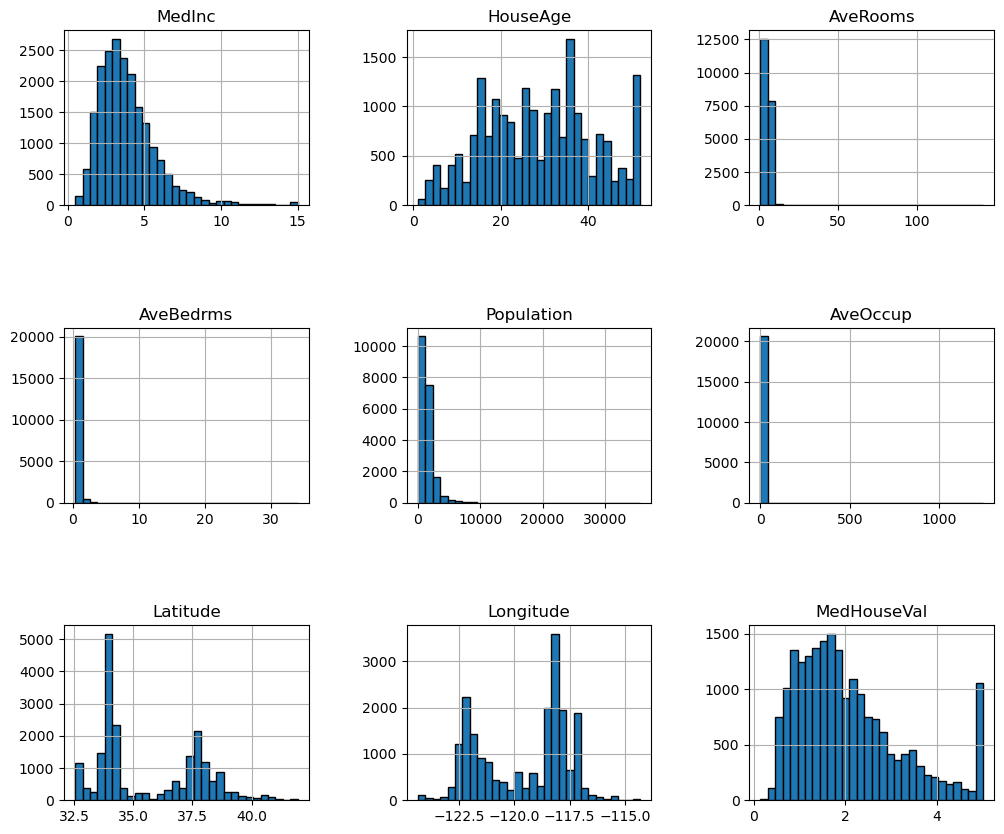

In [11]:
import matplotlib.pyplot as plt

california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [12]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
california_housing.frame[features_of_interest].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


Mean Absolute Error: 0.5332001304956553
Mean Squared Error: 0.5558915986952444
Root Mean Squared Error: 0.7455813830127764
R-squared: 0.5757877060324508


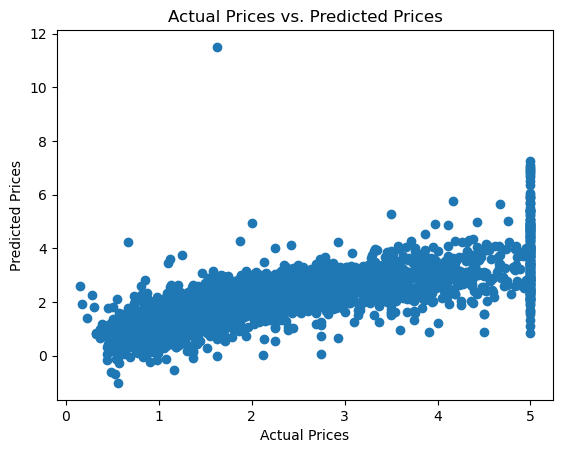

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load the housing dataset
X = california_housing.data
y = california_housing.target

# Split the dataset into training and testing sets (you can adjust the test_size and random_state)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = linear_model.LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

# Optionally, you can visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

## $R^2$ score

The following example ([source](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)) uses a single predictive feature of the [diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) dataset to illustrate the application of OLS regression. In the example, a two-dimensional plot is displayed that shows how linear regression attempts to fit a straight line that minimizes the *residual sum of squares* between the responses observed in the dataset and the responses predicted by the linear approximation. The coefficients, the residual sum of the squares and the variance score are also calculated.

Coefficients: [249.69674889]
MSE: 4061.83
R2: 0.23


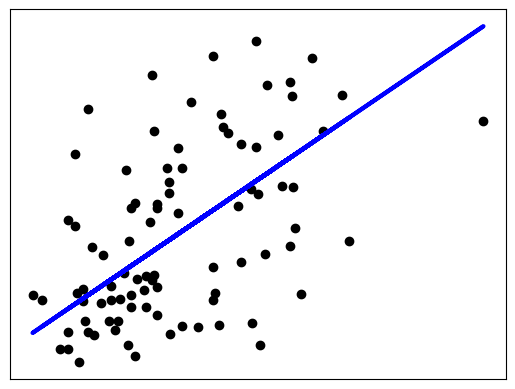

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# For simplicity's sake, use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]
diabetes_y = diabetes.target

diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = \
  train_test_split(diabetes_X,
                   diabetes_y,
                   train_size=.8,
                   random_state=42)

min_max_scaler = MinMaxScaler()
diabetes_X_train = min_max_scaler.fit_transform(diabetes_X_train)
diabetes_X_test = min_max_scaler.transform(diabetes_X_test)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training set
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients:', regr.coef_)

# The mean squared error
print("MSE: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# Explained variance score: 1 is perfect prediction
print('R2: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In the example above, also note the use of the `r2_score` function. In a regression task, the value returned by this function corresponds to the variance explained by the model: the value 1 corresponds to the perfect prediction. If the regression model naive, that is, it predicts $\bar{y}$ for any example, then $R^2$ is equal to zero. The coefficient can also assume negative values, when the regression model has a worse quality than the naive regression model. This value is known as the coefficient of determination and is computed using the following equation:

$$
R^{2} = 1- \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}
$$

In the equation above, $\text{SS}_{\text{tot}}$ is the *total sum of squares*. This value is proportional to the variance of the components of $\mathbf{y}$, the response vector. If $\hat{y}$ is the average of the components of $\mathbf{y}$, then $\text{SS}_{\text{tot}}$ is computed as below:

$$
\text{SS}_{\text{tot}} = \sum_{i=1}^{m}\left[y^{(i)}-{\bar {y}}\right]^{2}
$$

The value $\text{SS}_{\text{res}}$ corresponds to the *residual sum of squares*. $\text{SS}_{\text{res}}$ is computed as below:

$$
\text{SS}_{\text{res}} = \sum_{i=1}^{m}\left[y^{(i)}-h_\Theta(x^{(i)})\right]^{2}
$$

The following figure gives an intuition about the meaning of the $R^2$ score. The better the linear regression (on the right) fits the data compared to the simple average (in the graph on the left), the closer the value of $R^{2}$ will be. The areas of the blue squares ($\text{SS}_{\text{res}}$) represent the square residues in relation to the linear regression. The areas of the red squares ($\text{SS}_{\text{tot}}$) represent the square residues in relation to the average value.

<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/Coefficient_of_Determination.svg/600px-Coefficient_of_Determination.svg.png'></center>

# Final Remaks

Please notice that there are many other evaluation metrics for supervised learning tasks. Some of them are:

* True Positive Rate: proportion of positive samples that were correctly classified

* False Positive Rate: the proportion of negative samples that were incorrectly classified

* Likelihood

* Posterior probability

* Cost/utility

* Margin

* KL divergence

Also notice that unsupervised learning task (e.g., clustering methods, association rules methods, etc.) have their own evaluation metrics.


# Bonus: Cut-off point

A *cut-off point* is a certain threshold value used by a binary classification model to determine the class a given example $x$ belongs to.

> if $\Pr(class(x)=1) \geq \alpha$, then predict class 1; predict class 0 otherwise

Where:
 -  $\alpha$ is the cut off point ($0 < \alpha < 1$);
-  $\Pr(class(x)=1)$ is the probability that $x$ belongs to the class denoted by 1.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

# Create a synthetic dataset for binary classification
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       145
           1       0.88      0.83      0.85       155

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



The above code consider the default value of 0.5 as a threshold to decide the class of a given input example. We can confirm this by inspecting the following piece of code:

In [17]:
default_threshold = 0.5
y_pred = (y_pred >= default_threshold).astype(int)
# Calculate and print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       145
           1       0.88      0.83      0.85       155

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



However, the best threshold (aka cut-off point) for a given task may not be 0.5. In fact, this value can vary depending on the specific problem and the associated costs of misclassification. It's essential to choose a threshold that aligns with the objectives and constraints of your application.

One way to find the best threshold is through the ROC curve. We use this curve to compute the so-called [Yound's $J$ statistic](https://en.wikipedia.org/wiki/Youden%27s_J_statistic). This statistic is computed using the equation below.

$$
J = \text{TPR} - \text{FPR} = {\text{sensitivity}}+{\text{specificity}}-1
$$

The $J$ statistic is defined for all points of a ROC curve, and the maximum value of the statistic may be used as a criterion for selecting the optimum cut-off point. The index is represented graphically as the height above the chance line (see image below).

<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/ROC_Curve_Youden_J.png/330px-ROC_Curve_Youden_J.png'></center>

Let's compute the best cut-off point for our toy classification problem.

In [ ]:
# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Calculate the Youden's J statistic at each threshold setting
j_scores = tpr - fpr
print(j_scores)

In [ ]:
# Find the threshold setting that maximizes the Youden index
optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

To modify the binary classifier to use the new classification threshold of 0.43 instead of the default value of 0.5, we can update the way this classifier makes predictions and then calculate the classification report. Here's the modified code:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

# Create a synthetic dataset for binary classification
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities instead of binary outcomes
y_prob = model.predict_proba(X_test)[:, 1]

# Apply the custom classification threshold (0.43)
custom_threshold = 0.43
y_pred = (y_prob >= custom_threshold).astype(int)

# Calculate and print the classification report
print(classification_report(y_test, y_pred))


In the above code, we first predict probabilities using model.predict_proba(X_test)[:, 1], which gives us the probability of the positive class. Then, we apply the custom classification threshold of 0.43 by comparing the predicted probabilities with this threshold. Finally, we calculate and print the classification report using the custom threshold. Yout should notice that, as a result, we get a small improvement in the F1 score for bot negative and positive classes.

# Warning: Data Leakage!

**IMPORTANT**. It is important to notice that there is a methodological mistake in the code above, though. This mistake was introduced when we used information from the test set to computed the FPR and TPR rates, that were later used to computed the best threshold. 

> fpr, tpr, thresholds = roc_curve(y_test, y_prob)

This is an instance of a mistake generally known as **data leakage** (see the [Wikipedia entry](https://en.wikipedia.org/wiki/Leakage_(machine_learning))).

Data leakage is a common issue in supervised machine learning that can lead to poor model performance and unreliable predictions. It occurs when the training data contains information that is not representative of the real-world data that the model will be used to predict on. This can happen in a variety of ways, such as:

- Target leakage: This is when the target variable (the variable you are trying to predict) is included directly or indirectly in the training data. For example, if you are trying to predict the price of a house, you would not want to include the house's sale price in the training data.
- Train-test contamination: This is when information from the validation or test data leaks into the training data. This can happen if the data is not properly separated, or if the validation or test data is used to select or tune the model.
- Feature engineering leakage: This is when feature engineering processes introduce information that is not available in the real-world data. For example, if you are trying to predict whether a customer will churn, you would not want to use features that are based on future customer behavior.

To correct this mistake, we will have to talk about another important activity in a ML pipeline, which is called **model selection**. 